In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import folium
import plotly.express as px
import dash
import numpy as np
import seaborn as sns

## Load the Dataset
We start by loading the dataset **`Online Retail.xlsx`** using the **pandas** library.  
This dataset contains transactional data including invoices, products, customers, and countries.


In [2]:
df = pd.read_excel("D:/Data Science DEPI/Datasets/online+retail/Online Retail.xlsx")

## Preview the Dataset
Let's take a quick look at the first few rows of the dataset to understand its structure and contents.


In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Dataset Information
Display the basic information about the dataset, including the number of rows, columns, data types, and non-null values for each column.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Statistical Summary
Generate descriptive statistics for the numerical columns, including count, mean, standard deviation, minimum, maximum, and quartiles.  
This helps us understand the distribution and range of values in the dataset.


In [5]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


## Unique Values per Column
Check the number of unique values in each column.  
This helps us understand the diversity of data, such as the number of unique invoices, products, customers, and countries.


In [6]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

## Missing Values
Check for missing values in each column.  
Identifying null values is an important step before cleaning the dataset, as it allows us to decide whether to drop or impute them.


In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## Drop Missing Customer IDs
Remove rows where the `CustomerID` is missing.  
This is important for customer-level analysis (e.g., RFM, CLV), since transactions without a customer ID cannot be linked to a specific customer.


In [8]:
df.dropna(subset=["CustomerID"])  

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## Quantity Statistics
Generate descriptive statistics for the `Quantity`and `UnitPrice` columns.  
This helps identify unusual values, such as negative quantities (returns) or very large order sizes that may indicate outliers.


In [9]:
df["Quantity"].describe()



count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [10]:
df["UnitPrice"].describe().reset_index()

,index,UnitPrice
0,count,541909.000000
1,mean,4.611114
2,std,96.759853
3,min,-11062.060000
4,25%,1.250000
5,50%,2.080000
6,75%,4.130000
7,max,38970.000000


## Create TotalPrice Column
Add a new column `TotalPrice`, calculated as `Quantity * UnitPrice`.  
This represents the total revenue for each line item and will be very useful in revenue-based analyses.


In [11]:
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
print(df[["Description", "Quantity", "UnitPrice", "TotalPrice"]].head())


                           Description  Quantity  UnitPrice  TotalPrice
0   WHITE HANGING HEART T-LIGHT HOLDER         6       2.55       15.30
1                  WHITE METAL LANTERN         6       3.39       20.34
2       CREAM CUPID HEARTS COAT HANGER         8       2.75       22.00
3  KNITTED UNION FLAG HOT WATER BOTTLE         6       3.39       20.34
4       RED WOOLLY HOTTIE WHITE HEART.         6       3.39       20.34


## Convert InvoiceDate to Datetime
Convert the `InvoiceDate` column to datetime format.  
This will allow us to perform time-based analysis, such as sales trends by day, month, or year.


In [12]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])


## Extract Date Features
Create new columns for `Year`, `Month`, and `Day` from the `InvoiceDate` column.  
These features will help in analyzing sales patterns over time, such as yearly or monthly trends.


In [13]:
df["Year"] = df["InvoiceDate"].dt.year
df["Month"] = df["InvoiceDate"].dt.month
df["Day"] = df["InvoiceDate"].dt.day


In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1


## Top Products by Quantity
Group the data by product `Description` and calculate the total `Quantity` sold for each product.  
Sorting the results in descending order allows us to identify the top-selling products by volume.


In [15]:
top_products_quantity =df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
top_products_quantity.reset_index()

,Description,Quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
1,JUMBO BAG RED RETROSPOT,47363
2,ASSORTED COLOUR BIRD ORNAMENT,36381
3,POPCORN HOLDER,36334
4,PACK OF 72 RETROSPOT CAKE CASES,36039
5,WHITE HANGING HEART T-LIGHT HOLDER,35317
6,RABBIT NIGHT LIGHT,30680
7,MINI PAINT SET VINTAGE,26437
8,PACK OF 12 LONDON TISSUES,26315
9,PACK OF 60 PINK PAISLEY CAKE CASES,24753


In [16]:
data = top_products_quantity.reset_index()
data = data.sort_values("Quantity", ascending=True)

fig = px.bar(
    data,
    x="Quantity",
    y="Description",
    orientation='h',
    text="Quantity",
    color="Quantity",
    color_continuous_scale="Viridis",
    title="Top 10 Products by Quantity Sold"
)
fig.update_layout(
    yaxis={'categoryorder':'total ascending'},
    xaxis_title="Total Quantity Sold",
    yaxis_title="Product Description",
    plot_bgcolor='white'
)

fig.show()


#  Top 10 Products by Revenue

To identify the most profitable products, we calculate the **total revenue** for each product:

- **TotalPrice** = Quantity × UnitPrice  
- Group the data by **Description** (product name)  
- Sum the revenue for each product  
- Sort the results in descending order  
- Display the **Top 10 products**

This helps us understand which products generate the highest sales value.


In [90]:
top_products_revenue=df.groupby("Description")["TotalPrice"].sum().sort_values(ascending=False)
top_products_revenue.reset_index().head(10)

,Description,TotalPrice
0,DOTCOM POSTAGE,206245.48
1,REGENCY CAKESTAND 3 TIER,164762.19
2,WHITE HANGING HEART T-LIGHT HOLDER,99668.47
3,PARTY BUNTING,98302.98
4,JUMBO BAG RED RETROSPOT,92356.03
5,RABBIT NIGHT LIGHT,66756.59
6,POSTAGE,66230.64
7,PAPER CHAIN KIT 50'S CHRISTMAS,63791.94
8,ASSORTED COLOUR BIRD ORNAMENT,58959.73
9,CHILLI LIGHTS,53768.06


In [ ]:
top_products_revenue_df = top_products_revenue.reset_index().head(10)
fig = px.bar(
    top_products_revenue_df,
    x=top_products_revenue_df.columns[0],
    y=top_products_revenue_df.columns[1], 
    title="Top 10 Products by Revenue",
    text=top_products_revenue_df.columns[1],
    color=top_products_revenue_df.columns[1],
    color_continuous_scale="viridis"
)

fig.update_traces(texttemplate='%{text:,.0f}', textposition='inside')
fig.update_layout(xaxis_tickangle=20, height=600)
fig.show()


#  Top 10 Customers by Revenue

Identify the customers who spent the most by calculating the **total revenue (TotalPrice)** per CustomerID:

- Group the data by **CustomerID**  
- Sum the total revenue per customer  
- Sort in descending order  
- Display the **Top 10 customers**

This helps in customer segmentation and identifying high-value customers.


In [160]:
top_customers = df.groupby("CustomerID")["TotalPrice"].sum().sort_values(ascending=False).head(10)
top_customers.reset_index()

,CustomerID,TotalPrice
0,14646.0,279489.02
1,18102.0,256438.49
2,17450.0,187482.17
3,14911.0,132572.62
4,12415.0,123725.45
5,14156.0,113384.14
6,17511.0,88125.38
7,16684.0,65892.08
8,13694.0,62653.10
9,15311.0,59419.34


In [162]:
top_customers = (
    df.groupby("CustomerID")["TotalPrice"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
top_customers_df = top_customers.reset_index()
top_customers_df['CustomerID'] = top_customers_df['CustomerID'].astype(int).astype(str)
fig = px.bar(
    top_customers_df,
    x="TotalPrice",
    y="CustomerID",
    orientation="h",
    title="<b>Top 10 Customers by Total Spending</b>",
    labels={"TotalPrice": "Total Spending ($)", "CustomerID": "Customer ID"},
    color="TotalPrice",
    text="TotalPrice",
    color_continuous_scale="viridis"
)
fig.update_layout(
    title_x=0.5,
    xaxis_title="<b>Total Spending ($)</b>",
    yaxis_title="<b>Customer ID</b>",
    template="plotly_white",
    font=dict(size=12),
    height=600,
    yaxis=dict(autorange="reversed") 
)

fig.update_traces(texttemplate='%{text:,.0f}', textposition="inside")

fig.show()


# 🧾 Top 10 Customers by Number of Invoices

Analyze the **most frequent customers** based on how many distinct invoices each customer has:

- Group the data by **CustomerID**  
- Count the unique **InvoiceNo** values per customer  
- Sort the result in descending order  
- Display the **Top 10 customers**

This highlights repeat buyers and customer loyalty.


In [ ]:
customer_invoices = df.groupby("CustomerID")["InvoiceNo"].nunique().sort_values(ascending=False).head(10)
customer_invoices.reset_index().astype({"CustomerID": "int"})

,CustomerID,InvoiceNo
0,14911,248
1,12748,224
2,17841,169
3,14606,128
4,15311,118
5,13089,118
6,12971,89
7,14527,86
8,13408,81
9,14646,77


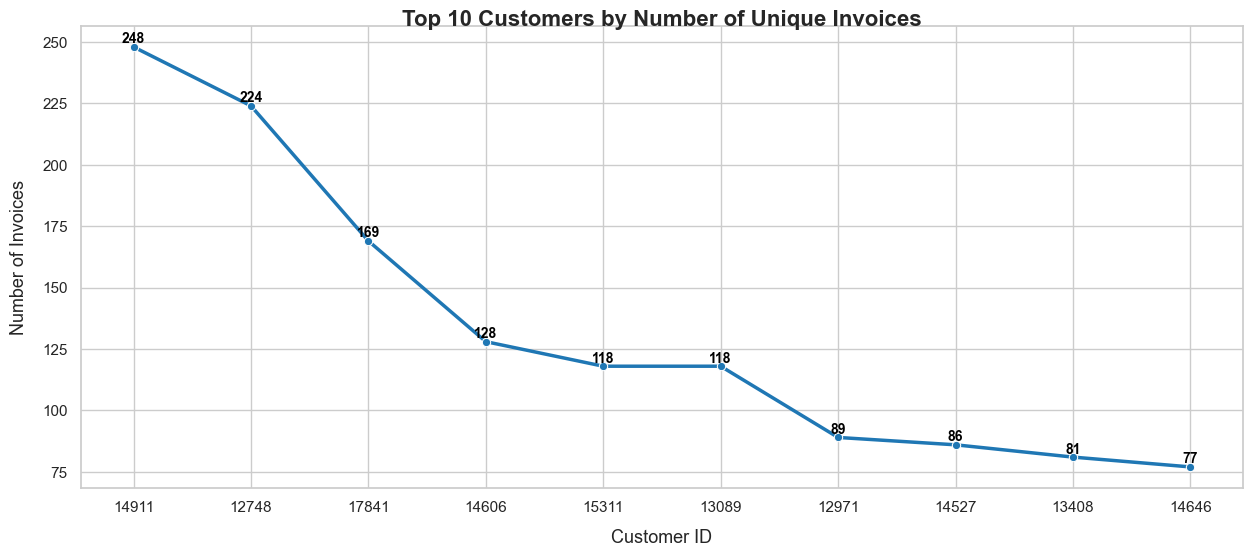

In [189]:
customer_invoices = (
    df.groupby("CustomerID")["InvoiceNo"]
    .nunique()
    .sort_values(ascending=False)
    .head(10)
)

customer_invoices_df = customer_invoices.reset_index().astype({"CustomerID": "int"})
customer_invoices_df["CustomerID"] = customer_invoices_df["CustomerID"].astype(str)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(15,6))
sns.lineplot(
    data=customer_invoices_df,
    x="CustomerID",
    y="InvoiceNo",
    marker="o",
    linewidth=2.5,
    color="#1f77b4"
)
plt.title("Top 10 Customers by Number of Unique Invoices", fontsize=16, fontweight="bold", pad=0)
plt.xlabel("Customer ID", fontsize=13, labelpad=10)
plt.ylabel("Number of Invoices", fontsize=13, labelpad=10)

plt.xticks(rotation=0)
for i, val in enumerate(customer_invoices_df["InvoiceNo"]):
    plt.text(
        i, val + 0.3, str(val),
        ha="center", va="bottom",
        fontsize=10, fontweight="bold", color="black"
    )
plt.show()


#  Top 10 Countries by Revenue

Identify which countries generate the most revenue:

- Group the data by **Country**  
- Sum the **TotalPrice** per country  
- Sort the results in descending order  
- Display the **Top 10 countries**

This helps in understanding market distribution and identifying key regions.


In [199]:
country_revenue = df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False)
country_revenue.head(10).reset_index()

,Country,TotalPrice
0,United Kingdom,8187806.364
1,Netherlands,284661.540
2,EIRE,263276.820
3,Germany,221698.210
4,France,197403.900
5,Australia,137077.270
6,Switzerland,56385.350
7,Spain,54774.580
8,Belgium,40910.960
9,Sweden,36595.910


In [210]:
country_revenue_df = country_revenue.reset_index()
fig = px.choropleth(
    country_revenue_df,
    locations="Country",
    locationmode="country names",
    color="TotalPrice",
    hover_name="Country",
    color_continuous_scale="blugrn",
    title="<b>Revenue by Country</b>"
)
fig.update_layout(
    title_x=0.5,
    width=1000,    
    height=700     
)
fig.show()


C:\Users\CS\AppData\Local\Temp\ipykernel_3308\1659200670.py:2: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



#  Unique Customers by Country

Analyze customer distribution across countries:

- Group the data by **Country**  
- Count the number of **unique customers (CustomerID)**  
- Sort in descending order  
- Display the result as a table

This helps to understand customer base diversity and identify markets with the highest number of distinct buyers.


In [21]:
country_customers = df.groupby("Country")["CustomerID"].nunique().sort_values(ascending=False)
country_customers.reset_index()


,Country,CustomerID
0,United Kingdom,3950
1,Germany,95
2,France,87
3,Spain,31
4,Belgium,25
5,Switzerland,21
6,Portugal,19
7,Italy,15
8,Finland,12
9,Austria,11


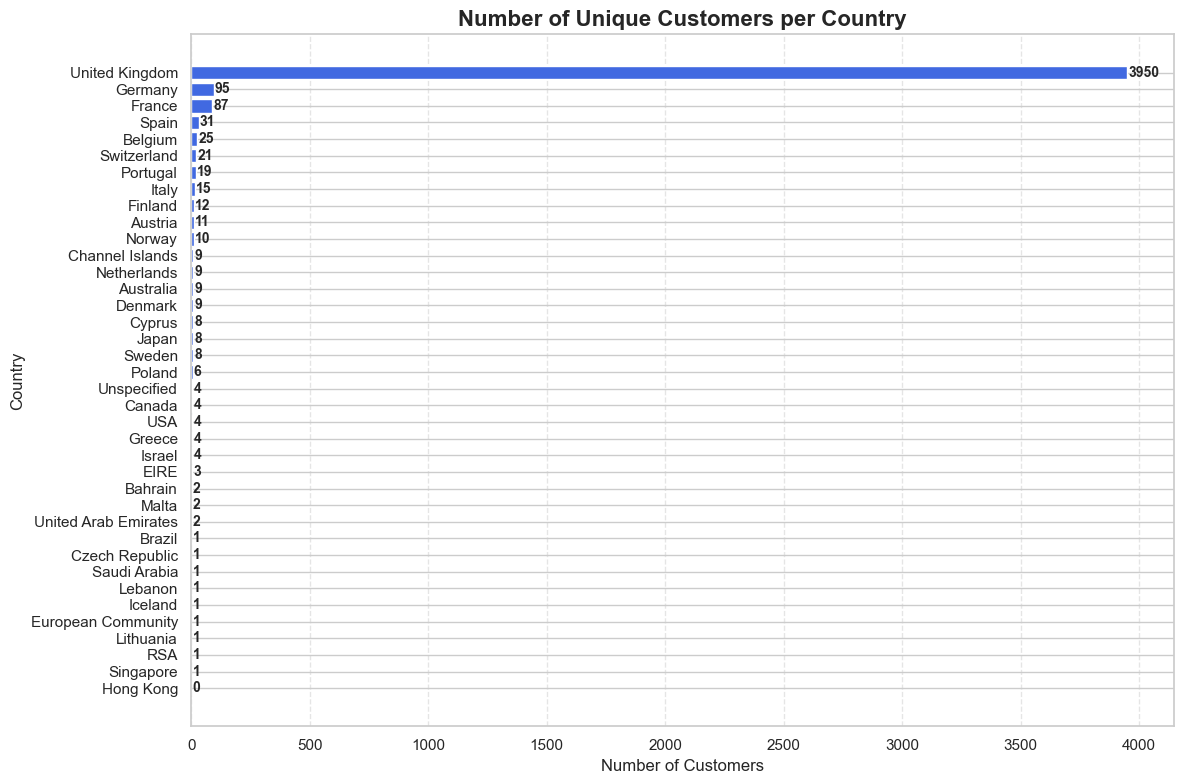

In [221]:
country_customers_df = country_customers.reset_index()

plt.figure(figsize=(12,8))

bars = plt.barh(
    country_customers_df["Country"],
    country_customers_df["CustomerID"],
    color="royalblue"
)

plt.gca().invert_yaxis()


for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 5,  
        bar.get_y() + bar.get_height()/2,
        str(int(width)),  
        va="center",
        fontsize=10,
        fontweight="bold"
    )

plt.title("Number of Unique Customers per Country", fontsize=16, fontweight="bold")
plt.xlabel("Number of Customers", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


# 📅 Monthly Sales Analysis

Track how sales evolve over time by aggregating monthly revenue:

- Group the data by **Year** and **Month**  
- Calculate the **sum of TotalPrice** for each period  
- Round the results to 2 decimal places  
- Display the results in a structured table  

This analysis highlights seasonal patterns, trends, and potential growth opportunities.


In [231]:
monthly_sales = df.groupby(["Year","Month"])["TotalPrice"].sum()
monthly_sales_df = round(monthly_sales ,2).reset_index()

monthly_sales_df

,Year,Month,TotalPrice
0,2010,12,748957.02
1,2011,1,560000.26
2,2011,2,498062.65
3,2011,3,683267.08
4,2011,4,493207.12
5,2011,5,723333.51
6,2011,6,691123.12
7,2011,7,681300.11
8,2011,8,682680.51
9,2011,9,1019687.62


In [ ]:
monthly_sales = df.groupby(["Year","Month"])["TotalPrice"].sum()
monthly_sales_df = round(monthly_sales, 2).reset_index()

monthly_sales_df["Date"] = pd.to_datetime(
    monthly_sales_df["Year"].astype(str) + "-" + monthly_sales_df["Month"].astype(str) + "-01"
)
fig = px.area(
    monthly_sales_df,
    x="Date",
    y="TotalPrice",
    title="<b>Monthly Sales Trend (All Months)</b>",
    labels={"TotalPrice": "Total Sales ($)", "Date": "Month"},
    color_discrete_sequence=["#1f77b4"]
)

fig.update_layout(
    title_x=0.5,
    template="plotly_white",
    font=dict(size=12)
)

fig.update_xaxes(
    dtick="M1",         
    tickformat="%b %Y"   
)

fig.show()


# 📆 Daily Sales Analysis

Analyze daily revenue trends:

- Group the data by **InvoiceDate** (date only)  
- Sum the **TotalPrice** for each day  
- Display the first 10 days as a sample  

This helps identify daily sales patterns, peak days, and anomalies.


In [23]:
daily_sales = df.groupby(df["InvoiceDate"].dt.date)["TotalPrice"].sum()
daily_sales.head(10).reset_index()


,InvoiceDate,TotalPrice
0,2010-12-01,58635.56
1,2010-12-02,46207.28
2,2010-12-03,45620.46
3,2010-12-05,31383.95
4,2010-12-06,53860.18
5,2010-12-07,45059.05
6,2010-12-08,44189.84
7,2010-12-09,52532.13
8,2010-12-10,57404.91
9,2010-12-12,17240.92
